In [1]:
import pandas as pd
import numpy as np
admindata = pd.read_csv('admission_data.csv')

<AxesSubplot:xlabel='Admit', ylabel='CGPA'>

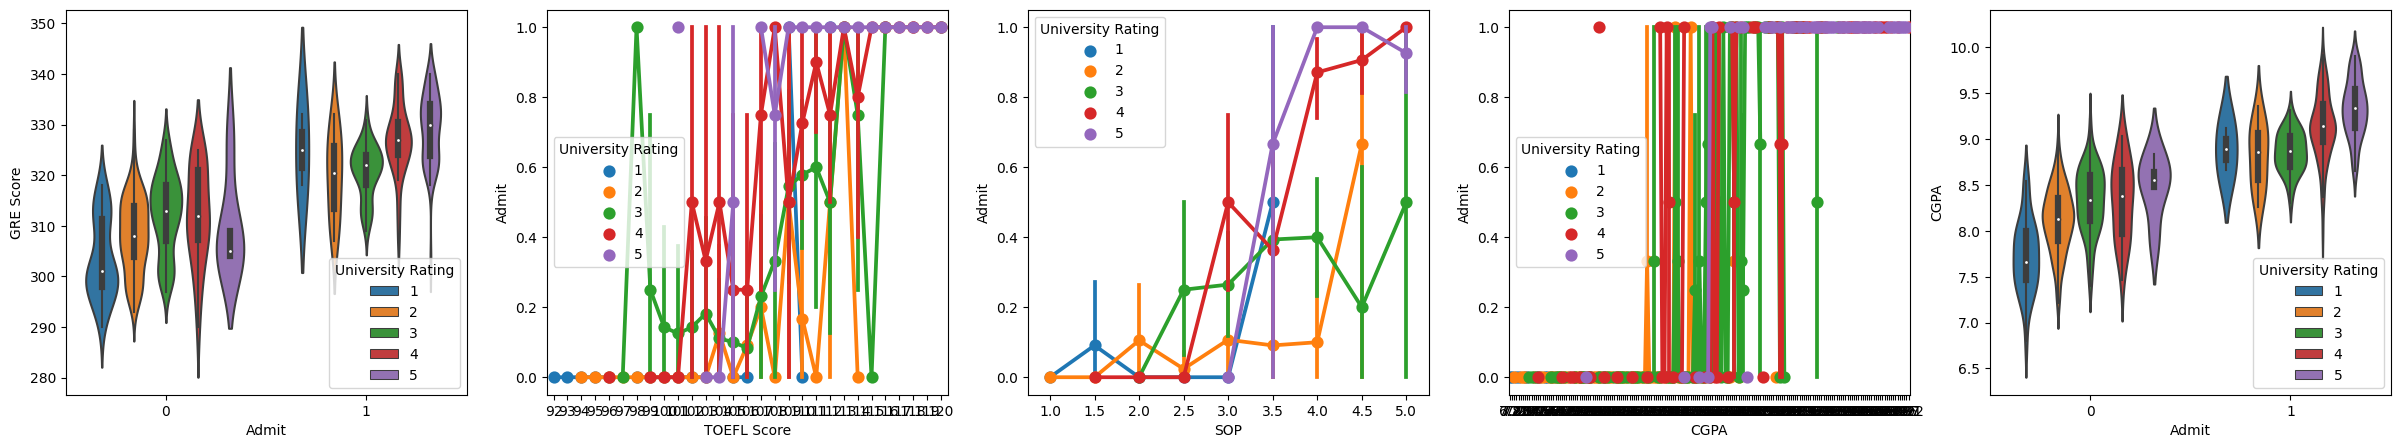

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="Admit", y="GRE Score", hue="University Rating", data=admindata, ax=axs[0])
sns.pointplot(x="TOEFL Score", y="Admit", hue="University Rating", data=admindata, ax=axs[1])
sns.pointplot(x="SOP", y="Admit", hue="University Rating", data=admindata, ax=axs[2])
sns.pointplot(x="CGPA", y="Admit", hue="University Rating", data=admindata, ax=axs[3])
sns.violinplot(x="Admit", y="CGPA", hue="University Rating", data=admindata, ax=axs[4])

In [3]:
admindata.corr().abs()[["Admit"]]


,Admit
GRE Score,0.706337
TOEFL Score,0.680069
University Rating,0.628067
SOP,0.613799
LOR,0.547264
CGPA,0.760048
Research,0.501233
Chance of Admit,0.801381
Admit,1.000000


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(admindata[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']], admindata.Admit, test_size=0.2, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [6]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [7]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)


SVC()

In [8]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.92


In [9]:
predict_array = [[100,100,5,1,1,2,0]]

predict_admit = model.predict(predict_array)
print(predict_admit)

[1]


In [10]:
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 


In [11]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.92


In [12]:
Xnew = [[425,355,3,3,3.5,8,1]]
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[425, 355, 3, 3, 3.5, 8, 1], Predicted=1
